In [3]:
import pandas as pd
import numpy as np
import csv
import os
import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
data =np.matrix(np.arange(423))

entries = os.scandir('./output/Caryothraustes')
for entry in entries:
    try:
        if (entry.is_file()):
            path = entry.path
            f = open(path, "r", encoding="cp1252", errors='ignore')
            embedding = f.read().strip().split("\n")
            name = entry.name
            for em in embedding:
                em = em.strip().split(",")
                em_times = em.pop(0).split("\t")
                em.insert(0, em_times[2])
                em.insert(0, em_times[1])
                em.insert(0, em_times[0])
                em = [float(i) for i in em]
                em.insert(0, name.split(".")[0])

    #            print(em)
                data = np.append(data, [em],axis=0)
    except Exception as e:
        print("issue with ", entry.name, e)
#    break
data = np.delete(data, 0, 0)
len(data)
data

matrix([['XC247232 - Yellow-green Grosbeak - Caryothraustes canadensis',
         '0.0', '3.0', ..., '2.4751663', '1.0784149', '0.92569387'],
        ['XC247232 - Yellow-green Grosbeak - Caryothraustes canadensis',
         '3.0', '6.0', ..., '2.1033857', '0.5470201', '0.7437095'],
        ['XC247232 - Yellow-green Grosbeak - Caryothraustes canadensis',
         '6.0', '9.0', ..., '2.20223', '0.32611567', '0.82903016'],
        ...,
        ['XC706559 - Yellow-green Grosbeak - Caryothraustes canadensis',
         '3.0', '6.0', ..., '0.93864685', '0.016353235', '0.7908056'],
        ['XC706559 - Yellow-green Grosbeak - Caryothraustes canadensis',
         '6.0', '9.0', ..., '0.96017927', '0.0', '0.8569442'],
        ['XC706559 - Yellow-green Grosbeak - Caryothraustes canadensis',
         '9.0', '12.0', ..., '0.747911', '0.0018666349', '1.0237637']],
       dtype='<U101')

In [20]:
embeddings = pd.DataFrame(data = data, columns=np.append(["name", "start", "end"], np.arange(420)))
embeddings

,name,start,end,0,1,2,3,4,5,6,...,410,411,412,413,414,415,416,417,418,419
0,XC247232 - Yellow-green Grosbeak - Caryothraus...,0.0,3.0,0.96780586,0.7696429,0.7566916,0.5276309,0.6750481,0.60097617,1.1111679,...,1.057159,0.89390236,0.17124617,1.2331834,0.5833737,1.7698057,1.3839778,2.4751663,1.0784149,0.92569387
1,XC247232 - Yellow-green Grosbeak - Caryothraus...,3.0,6.0,1.0375103,0.36767906,0.8889942,0.5878917,1.099438,0.7260235,1.4587171,...,0.9517273,0.8131411,0.1239872,0.6941577,1.4756675,1.0935555,1.3710234,2.1033857,0.5470201,0.7437095
2,XC247232 - Yellow-green Grosbeak - Caryothraus...,6.0,9.0,1.1404842,0.4516817,1.0180242,0.50113404,1.1251371,1.1232598,0.95683116,...,0.9016169,0.78059995,0.022648022,0.5692202,1.4415016,1.1948142,1.7760552,2.20223,0.32611567,0.82903016
3,XC247232 - Yellow-green Grosbeak - Caryothraus...,9.0,12.0,0.528979,0.40854192,0.38703716,0.5752307,0.89622074,1.0277789,1.5289059,...,0.9279932,0.63245374,0.05846131,0.72370845,0.81562513,1.4959551,1.268945,2.0372555,0.6799402,0.4290316
4,XC247232 - Yellow-green Grosbeak - Caryothraus...,12.0,15.0,0.47926795,0.2330809,1.4670991,0.38058358,1.1490374,0.58124036,1.4720895,...,0.8798763,0.5424261,0.27546874,0.50809187,0.84723085,1.5537384,1.3134613,1.4328353,0.6652348,0.73625064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,XC706558 - Yellow-green Grosbeak - Caryothraus...,9.0,12.0,1.044563,0.0,0.5621425,1.1742017,0.8706082,0.56280756,0.48909605,...,0.37034714,0.6192086,0.33935523,0.861513,1.8138095,0.24314824,0.5218001,0.9624017,0.039820075,1.0777539
465,XC706559 - Yellow-green Grosbeak - Caryothraus...,0.0,3.0,0.59271073,0.5454808,0.3523727,1.1254416,0.64895934,0.7273636,0.90034074,...,0.7674583,1.2280226,0.24330533,1.8080977,0.97477436,0.6132153,0.79350764,1.2844806,0.023998156,1.0222826
466,XC706559 - Yellow-green Grosbeak - Caryothraus...,3.0,6.0,0.86429477,0.26876202,0.43344134,1.2297645,0.55230725,0.6429932,1.1380336,...,0.7084085,0.9567225,0.14335948,1.5219283,1.1636775,0.7500175,0.6897124,0.93864685,0.016353235,0.7908056
467,XC706559 - Yellow-green Grosbeak - Caryothraus...,6.0,9.0,0.5192306,0.10775429,0.5355448,1.0018816,0.43788534,0.5198629,1.1784534,...,0.5421566,0.63671696,0.16573486,1.8367759,1.2102443,0.36987513,0.117290676,0.96017927,0.0,0.8569442


In [21]:
embeddings.to_csv("./embeddings-test.csv")

In [22]:
embeddings.groupby(["name", "start", "end"]).min()

0  \
name                                               start end                
XC247232 - Yellow-green Grosbeak - Caryothraust... 0.0   3.0   0.96780586   
                                                   12.0  15.0  0.47926795   
                                                   15.0  18.0  0.55699605   
                                                   18.0  21.0  0.55553627   
                                                   21.0  24.0   0.8069638   
...                                                                   ...   
XC706558 - Yellow-green Grosbeak - Caryothraust... 9.0   12.0    1.044563   
XC706559 - Yellow-green Grosbeak - Caryothraust... 0.0   3.0   0.59271073   
                                                   3.0   6.0   0.86429477   
                                                   6.0   9.0    0.5192306   
                                                   9.0   12.0   0.5668012   

                                                                        1  \
name                                               start end                
XC247232 - Yellow-green Grosbeak - Caryothraust... 0.0   3.0    0.7696429   
                                                   12.0  15.0   0.2330809   
                                                   15.0  18.0   1.0485655   
                                                   18.0  21.0   0.3414423   
                                                   21.0  24.0   0.9449874   
...                                                                   ...   
XC706558 - Yellow-green Grosbeak - Caryothraust... 9.0   12.0         0.0   
XC706559 - Yellow-green Grosbeak - Caryothraust... 0.0   3.0    0.5454808   
                                                   3.0   6.0   0.26876202   
                                                   6.0   9.0   0.10775429   
                                                   9.0   12.0  0.12406629   

                                                                        2  \
name                                               start end                
XC247232 - Yellow-green Grosbeak - Caryothraust... 0.0   3.0    0.7566916   
                                                   12.0  15.0   1.4670991   
                                                   15.0  18.0  0.24228054   
                                                   18.0  21.0  0.14366174   
                                                   21.0  24.0   1.3168631   
...                                                                   ...   
XC706558 - Yellow-green Grosbeak - Caryothraust... 9.0   12.0   0.5621425   
XC706559 - Yellow-green Grosbeak - Caryothraust... 0.0   3.0    0.3523727   
                                                   3.0   6.0   0.43344134   
                                                   6.0   9.0    0.5355448   
                                                   9.0   12.0   0.2110756   

                                                                        3  \
name                                               start end                
XC247232 - Yellow-green Grosbeak - Caryothraust... 0.0   3.0    0.5276309   
                                                   12.0  15.0  0.38058358   
                                                   15.0  18.0   0.6588802   
                                                   18.0  21.0  0.89578605   
                                                   21.0  24.0  0.82570255   
...                                                                   ...   
XC706558 - Yellow-green Grosbeak - Caryothraust... 9.0   12.0   1.1742017   
XC706559 - Yellow-green Grosbeak - Caryothraust... 0.0   3.0    1.1254416   
                                                   3.0   6.0    1.2297645   
                                                   6.0   9.0    1.0018816   
                                                   9.0   12.0   1.0727403   

                                                                

In [37]:
embeddings.get( map(str, range(0,420)))

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,0.96780586,0.7696429,0.7566916,0.5276309,0.6750481,0.60097617,1.1111679,1.4133127,1.3303425,0.75646836,...,1.057159,0.89390236,0.17124617,1.2331834,0.5833737,1.7698057,1.3839778,2.4751663,1.0784149,0.92569387
1,1.0375103,0.36767906,0.8889942,0.5878917,1.099438,0.7260235,1.4587171,1.6043367,0.9583471,0.8038128,...,0.9517273,0.8131411,0.1239872,0.6941577,1.4756675,1.0935555,1.3710234,2.1033857,0.5470201,0.7437095
2,1.1404842,0.4516817,1.0180242,0.50113404,1.1251371,1.1232598,0.95683116,1.8081942,1.1103601,0.6638358,...,0.9016169,0.78059995,0.022648022,0.5692202,1.4415016,1.1948142,1.7760552,2.20223,0.32611567,0.82903016
3,0.528979,0.40854192,0.38703716,0.5752307,0.89622074,1.0277789,1.5289059,2.008421,1.3170929,1.0672625,...,0.9279932,0.63245374,0.05846131,0.72370845,0.81562513,1.4959551,1.268945,2.0372555,0.6799402,0.4290316
4,0.47926795,0.2330809,1.4670991,0.38058358,1.1490374,0.58124036,1.4720895,1.8801525,1.0150075,0.7379396,...,0.8798763,0.5424261,0.27546874,0.50809187,0.84723085,1.5537384,1.3134613,1.4328353,0.6652348,0.73625064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1.044563,0.0,0.5621425,1.1742017,0.8706082,0.56280756,0.48909605,0.8985113,0.39136785,1.2911167,...,0.37034714,0.6192086,0.33935523,0.861513,1.8138095,0.24314824,0.5218001,0.9624017,0.039820075,1.0777539
465,0.59271073,0.5454808,0.3523727,1.1254416,0.64895934,0.7273636,0.90034074,0.6047425,0.7636748,1.1584177,...,0.7674583,1.2280226,0.24330533,1.8080977,0.97477436,0.6132153,0.79350764,1.2844806,0.023998156,1.0222826
466,0.86429477,0.26876202,0.43344134,1.2297645,0.55230725,0.6429932,1.1380336,0.21881092,0.39993322,1.0033636,...,0.7084085,0.9567225,0.14335948,1.5219283,1.1636775,0.7500175,0.6897124,0.93864685,0.016353235,0.7908056
467,0.5192306,0.10775429,0.5355448,1.0018816,0.43788534,0.5198629,1.1784534,0.27152562,0.33834273,1.1535313,...,0.5421566,0.63671696,0.16573486,1.8367759,1.2102443,0.36987513,0.117290676,0.96017927,0.0,0.8569442


In [39]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(embeddings.get( map(str, range(0,420))))
clusterer.labels_

array([ 0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [40]:
embeddings = embeddings.assign(cluster=clusterer.labels_)
embeddings[embeddings.get("cluster") == -1]

,name,start,end,0,1,2,3,4,5,6,...,411,412,413,414,415,416,417,418,419,cluster
6,XC247232 - Yellow-green Grosbeak - Caryothraus...,18.0,21.0,0.55553627,0.3414423,0.14366174,0.89578605,0.6853143,1.126376,0.9744287,...,0.2611239,0.57163876,0.12637192,0.8607971,1.3249125,1.4890013,1.4708304,0.40472543,0.13984886,-1
8,XC247232 - Yellow-green Grosbeak - Caryothraus...,24.0,27.0,0.107091695,0.65346205,0.27923232,0.42311627,1.2472298,0.8629118,1.5288129,...,1.3028489,0.21704096,0.7242639,1.2059443,1.7857003,1.6719327,1.8129095,0.3799537,0.559589,-1
9,XC247232 - Yellow-green Grosbeak - Caryothraus...,27.0,30.0,0.31059927,0.5729453,0.012827337,0.5886346,1.9273822,1.1940987,0.58368534,...,0.9040903,0.15607852,0.97852635,1.3617548,1.616807,2.2179356,1.9296567,1.4796406,0.7094678,-1
115,XC470128 - Yellow-green Grosbeak - Caryothraus...,12.0,15.0,1.0662835,0.8761002,1.0397122,0.64014214,1.7827876,0.11773276,2.4227355,...,0.26846272,0.13147616,0.47623217,1.0311545,3.7932649,3.650834,1.4768085,1.5553937,0.61190635,-1
156,XC494067 - Yellow-green Grosbeak - Caryothraus...,0.0,3.0,1.1027086,0.5715654,1.0222902,0.4047497,0.28282893,0.6282803,0.51667655,...,0.59322965,0.26805484,1.3728296,0.5467831,0.89999986,0.76423585,2.5942307,0.84178996,0.2450172,-1
187,XC504347 - Yellow-green Grosbeak - Caryothraus...,0.0,3.0,1.2772961,0.51050556,0.91597813,0.69743764,0.93673396,0.7391734,0.79854584,...,0.72261626,0.29702884,0.7554291,1.0427082,0.89186114,0.84866434,0.49261105,0.32151115,1.0655828,-1
192,XC504347 - Yellow-green Grosbeak - Caryothraus...,15.0,18.0,0.3507024,0.46529722,0.09575522,0.62951845,0.3193398,0.88423884,1.3884438,...,0.6255105,0.59170294,1.2261909,0.99003315,0.43815452,0.61135155,0.5150672,0.30656308,1.1124675,-1
194,XC504347 - Yellow-green Grosbeak - Caryothraus...,21.0,24.0,0.20683473,0.8210863,0.7935742,1.1401021,0.55540323,1.5581576,1.5283321,...,0.9156054,0.70698833,1.1011362,2.4563208,1.2952468,1.1983548,1.1169201,0.10270703,0.78570807,-1
195,XC504347 - Yellow-green Grosbeak - Caryothraus...,24.0,27.0,0.21078533,0.37440884,1.4855763,1.0647933,0.7961148,0.92039967,1.425882,...,0.9880788,0.39004588,0.955737,1.216605,1.2266771,0.8814441,0.8784375,0.856634,0.61731696,-1
371,XC553115 - Yellow-green Grosbeak - Caryothraus...,168.0,171.0,0.13188982,0.67733455,0.15806407,2.158055,1.1413733,0.73163605,1.3553033,...,0.28961498,1.1741434,0.9719069,1.5743077,0.8151016,0.91111815,0.6736351,0.0771029,0.4514569,-1


In [42]:
pca = PCA(n_components = 2) # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(embeddings.get( map(str, range(0,420))))

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1
0,-0.011989,0.094473
1,0.038931,0.006568
2,0.019465,0.032305
3,0.063944,-0.068895
4,0.026305,-0.008437


In [43]:
np.unique(clusterer.labels_)

array([-1,  0,  1], dtype=int64)

In [44]:
X_train_pc

array([[ 1.83272399e+00,  2.95343347e+00],
       [ 1.20993168e+00,  2.97181660e+00],
       [ 2.81635064e+00,  4.57583379e+00],
       [ 8.91999834e-01,  3.59354854e+00],
       [ 8.71306528e-01,  3.13623938e+00],
       [ 6.79374275e-01,  2.10721123e+00],
       [-1.03255090e+00,  2.01751931e+00],
       [ 1.74069181e+00,  4.00090792e+00],
       [ 3.02677997e+00,  4.73275857e+00],
       [ 2.17602159e+00,  1.90909308e+00],
       [ 1.48125571e+00,  2.29254275e+00],
       [ 1.14800045e+00,  1.80261504e+00],
       [ 1.98174333e+00, -8.82935520e-01],
       [ 7.22086466e-01, -1.79139078e+00],
       [-3.21936013e+00,  8.88489389e-02],
       [-4.64997177e+00, -6.84217962e-01],
       [-1.28813403e+00, -9.26427271e-01],
       [-6.41054508e-01, -2.28501882e+00],
       [-3.33196976e+00, -6.50488661e-01],
       [-4.81103157e+00, -6.91119588e-01],
       [-4.27133706e-01, -2.08209662e+00],
       [ 3.24595877e+00, -1.23233712e+00],
       [ 6.87983552e+00, -1.37702161e+00],
       [ 3.

In [45]:

pca_embeddings = pd.DataFrame(data={"cluster": clusterer.labels_})
pca_embeddings = pd.concat([pca_embeddings, pd.DataFrame(X_train_pc)], axis=1)
pca_embeddings.columns = ["cluster", "x", "y"]
pca_embeddings

,cluster,x,y
0,0,1.832724,2.953433
1,0,1.209932,2.971817
2,0,2.816351,4.575834
3,0,0.892000,3.593549
4,0,0.871307,3.136239
...,...,...,...
464,1,-0.668965,2.462222
465,1,0.572901,2.184361
466,1,-0.296436,1.400646
467,1,-1.779281,1.036649


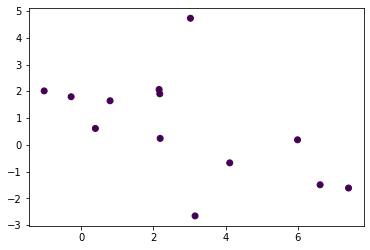

In [46]:
embeddings_to_plot = pca_embeddings[pca_embeddings.get("cluster") == -1]
plot = plt.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"), c=embeddings_to_plot.get("cluster"))

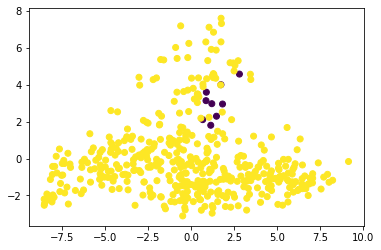

In [47]:
embeddings_to_plot = pca_embeddings[pca_embeddings.get("cluster") != -1]
plot = plt.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"), c=embeddings_to_plot.get("cluster"))

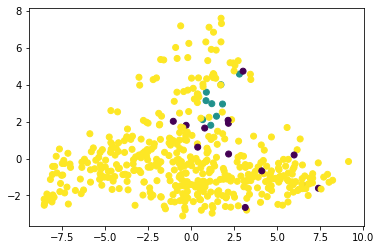

In [48]:
embeddings_to_plot = pca_embeddings
plot = plt.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"), c=embeddings_to_plot.get("cluster"))